In [2]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math
import sklearn.preprocessing

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import tensorflow.keras.backend as K

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

In [19]:
b = datasets.load_breast_cancer()
X = b.data  
y = b.target
print(X.shape)

(569, 30)


In [20]:
x_neg_0=np.zeros(212)
x_pos_0=np.ones(357)

In [21]:
x_neg=X[y==0]
x_pos=X[y==1]
print(x_neg.shape)
print(x_pos.shape)

(212, 30)
(357, 30)


In [22]:
x_negt = np.insert(x_neg, 30, x_neg_0, axis=1)
x_post = np.insert(x_pos, 30, x_pos_0, axis=1)

In [23]:
x_train = np.concatenate((x_post, x_negt)).reshape(-1, 31)
y_train = y.reshape(-1, 1).astype(int)
print(x_train.shape)

(569, 31)


In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [25]:
print(x_train)

[[-0.16679919 -1.1471623  -0.18572799 ...  0.12334653 -0.62929189
   0.77060855]
 [-0.29744572 -0.83300824 -0.26110605 ...  0.45822712 -0.11724974
   0.77060855]
 [-1.31308049 -1.59395919 -1.30280622 ... -0.72922385 -0.34445459
   0.77060855]
 ...
 [ 1.70485436  2.08513394  1.61593137 ... -0.53185462 -0.97397828
  -1.29767572]
 [ 0.70228425  2.0455738   0.67267578 ... -1.10454895 -0.31840916
  -1.29767572]
 [ 1.83834103  2.33645719  1.98252415 ...  1.91908301  2.21963528
  -1.29767572]]


In [26]:
x_n=np.concatenate((np.ones(106),np.zeros(106)))
x_test=x_neg
np.random.shuffle(x_test)
x_test=np.insert(x_test, 30, x_n, axis=1).reshape(-1,31)
y_test=np.zeros(212).reshape(-1,1)
x_test=scaler.transform(x_test)

In [27]:
x_train.shape

(569, 31)

In [28]:
y_train.shape

(569, 1)

# Model training

In [89]:
additional_metrics = ['acc']
loss_function = BinaryCrossentropy()
number_of_epochs = 20000
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [90]:
model = Sequential()
model.add(Dropout(0.1, input_shape=(31,)))
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [91]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                320       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [93]:
batch_size = len(x_train)

In [94]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

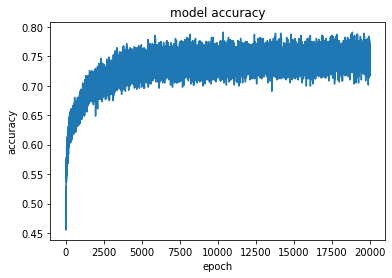

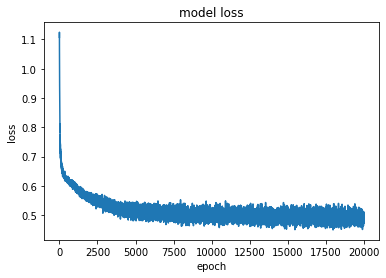

In [95]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

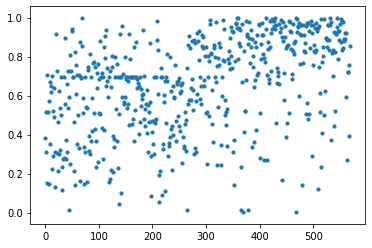

In [96]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [46]:
layer_size = 15
number_of_epochs = 15000
model = Sequential()

In [47]:
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________


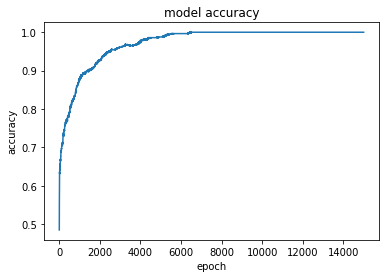

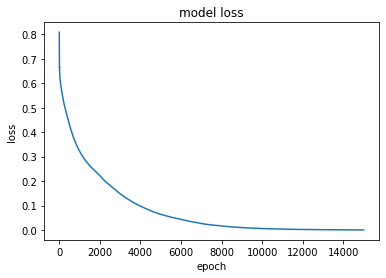

In [48]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=3
#epochs 2000

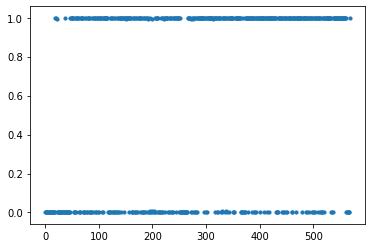

In [49]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

In [98]:
layer_size = 10
number_of_epochs = 40000
model = Sequential()
model.add(Dense(layer_size,input_dim=31,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.1))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                320       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
_________________________________________________________________
dropout_9 (Dropout)          (None, 1)                 0         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


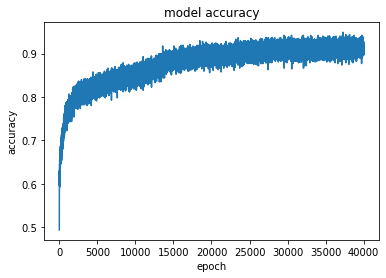

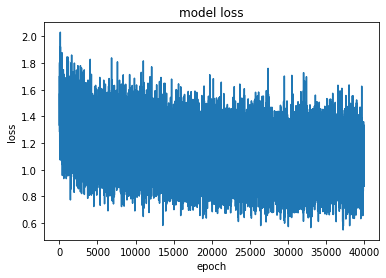

In [99]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1

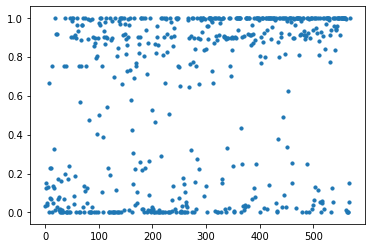

In [100]:
preds =model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=10)

# Bloom Filter

In [74]:
class BloomFilter:
    
    def __init__(self, size, model): #hash count is 1
        self.size = size
      #  self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        self.model=model #classifier model associated as hash function
        
    def add(self, num):
        result=math.floor(model.predict(num)[0]*(self.size-1))    
        self.bit_array[result] = 1
            
    def lookup(self, num):
        #for seed in range(1,self.hash_count+1):
            #result = mmh3.hash(str(num), seed) % self.size
        result=math.floor(self.model.predict(num)[0]*(self.size-1))    
        if self.bit_array[result] == 0:
                return False
        return True

    def add_init(self,x_train,y_train):
        pred = self.model.predict(x_train)
        for i in range(len(pred)):
            if(y_train[i]==1):
                result = math.floor(pred[i][0]*(self.size-1))
                self.bit_array[result] = 1
    
    def predict(self,x):
        initpred = self.model.predict(x)
        indexes = []
        for i in range(len(initpred)):
            indexes += [math.floor(initpred[i][0]*(bf.size-1))]
        pred = []
        for i in indexes:
            pred += [self.bit_array[i]]
        return np.array(pred)

#(Input:bloom filter,number array,ratio; Output:(-1) for false negative, otherwise fpr)
def fpr_kraska_hash(bf,x,y):
    pred = bf.predict(x)
    tn, fp, fn, tp = confusion_matrix(y, pred,labels=[False,True]).ravel() 
    return fp/(fp+tn)

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k


def fpr_test(x,bf,y):
    pred=bf.predict(x)
    fp=0
    tn=0
    for i in range(len(pred)):
        if((pred[i]==1)and(y[i]==0)):
            fp+=1
        if((pred[i]==0) and (y[i]==0)):
            tn+=1
        if((pred[i]==0) and (y[i]==1)):
            return -1
    print(fp)
    print(tn)
    return fp/(fp+tn)
#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    find_fpr(m,model,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [101]:
m=30

In [102]:
bf=BloomFilter(m,model)

In [103]:
bf.add_init(x_train,y_train)

In [104]:
pred = bf.predict(x_train)
tn, fp, fn, tp = confusion_matrix(y_train, pred,labels=[False,True]).ravel() # ravel opens up the 2x2 matrix
print(tn)
print(tp)
print(fp)
print(fn)

79
357
133
0


In [105]:
print(fpr_kraska_hash(bf,x_train,y_train))

0.6273584905660378


In [106]:
print(fpr_kraska_hash(bf,x_test,y_test))

0.8867924528301887
